### Importación de datos



In [15]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [16]:
datasets=[tienda, tienda2, tienda3, tienda4]
ingreso_total=list((map(lambda ds: float(ds['Precio'].sum()), datasets)))



In [17]:
print(type(tienda))

<class 'pandas.core.frame.DataFrame'>


In [18]:
tiendas_nombres=["tienda", "tienda2","tienda3", "tienda4"]
agrupado= list(zip(tiendas_nombres ,ingreso_total))
for (tiendas, sum) in agrupado:
    print(f"Las ventas totales de la {tiendas} es {sum}")

Las ventas totales de la tienda es 1150880400.0
Las ventas totales de la tienda2 es 1116343500.0
Las ventas totales de la tienda3 es 1098019600.0
Las ventas totales de la tienda4 es 1038375700.0


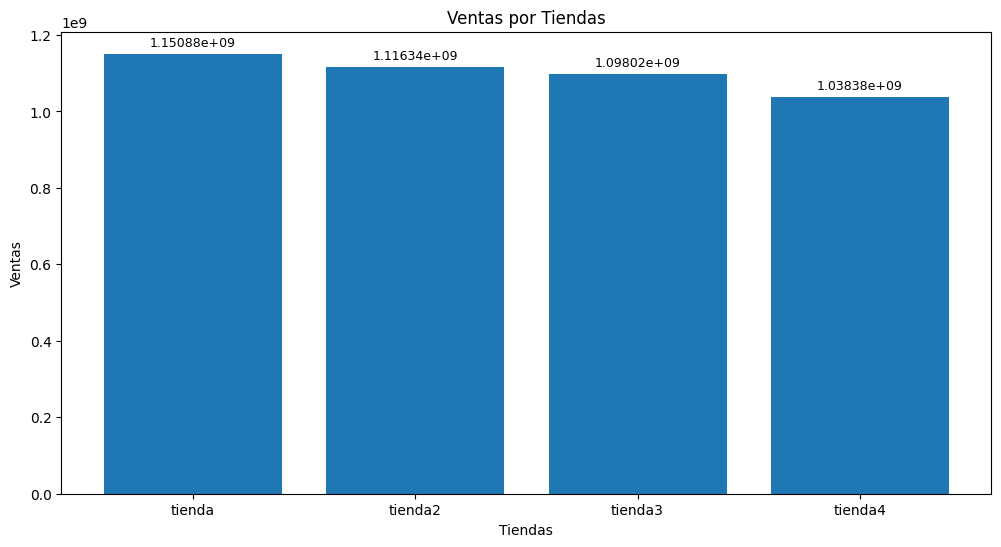

In [28]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 6))  # forma moderna

# Crear el gráfico de barras
bars_1=ax.bar(tiendas_nombres, ingreso_total)

# Título y etiquetas opcionales
plt.title("Ventas por Tiendas")
plt.xlabel("Tiendas")
plt.ylabel("Ventas")
ax.bar_label(bars_1, padding=3, fontsize=9)
plt.savefig("ventasxtienda.png", bbox_inches='tight')

# Mostrar el gráfico
plt.show()

# 2. Ventas por categoría

In [20]:
resultados = {}
tiendas_nombres = ['tienda', 'tienda2', 'tienda3', 'tienda4']

for i, data in enumerate(datasets):
    resultado = data.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
    resultados[tiendas_nombres[i]] = resultado

for tiendas, resultado in resultados.items():
    print(f"Resultados para {tiendas}:")
    print(resultado)
    print("\n")


Resultados para tienda:
Categoría del Producto
Muebles                    465
Electrónicos               448
Juguetes                   324
Electrodomésticos          312
Deportes y diversión       284
Instrumentos musicales     182
Libros                     173
Artículos para el hogar    171
Name: Producto, dtype: int64


Resultados para tienda2:
Categoría del Producto
Muebles                    442
Electrónicos               422
Juguetes                   313
Electrodomésticos          305
Deportes y diversión       275
Instrumentos musicales     224
Libros                     197
Artículos para el hogar    181
Name: Producto, dtype: int64


Resultados para tienda3:
Categoría del Producto
Muebles                    499
Electrónicos               451
Juguetes                   315
Electrodomésticos          278
Deportes y diversión       277
Libros                     185
Artículos para el hogar    177
Instrumentos musicales     177
Name: Producto, dtype: int64


Resultados para tien

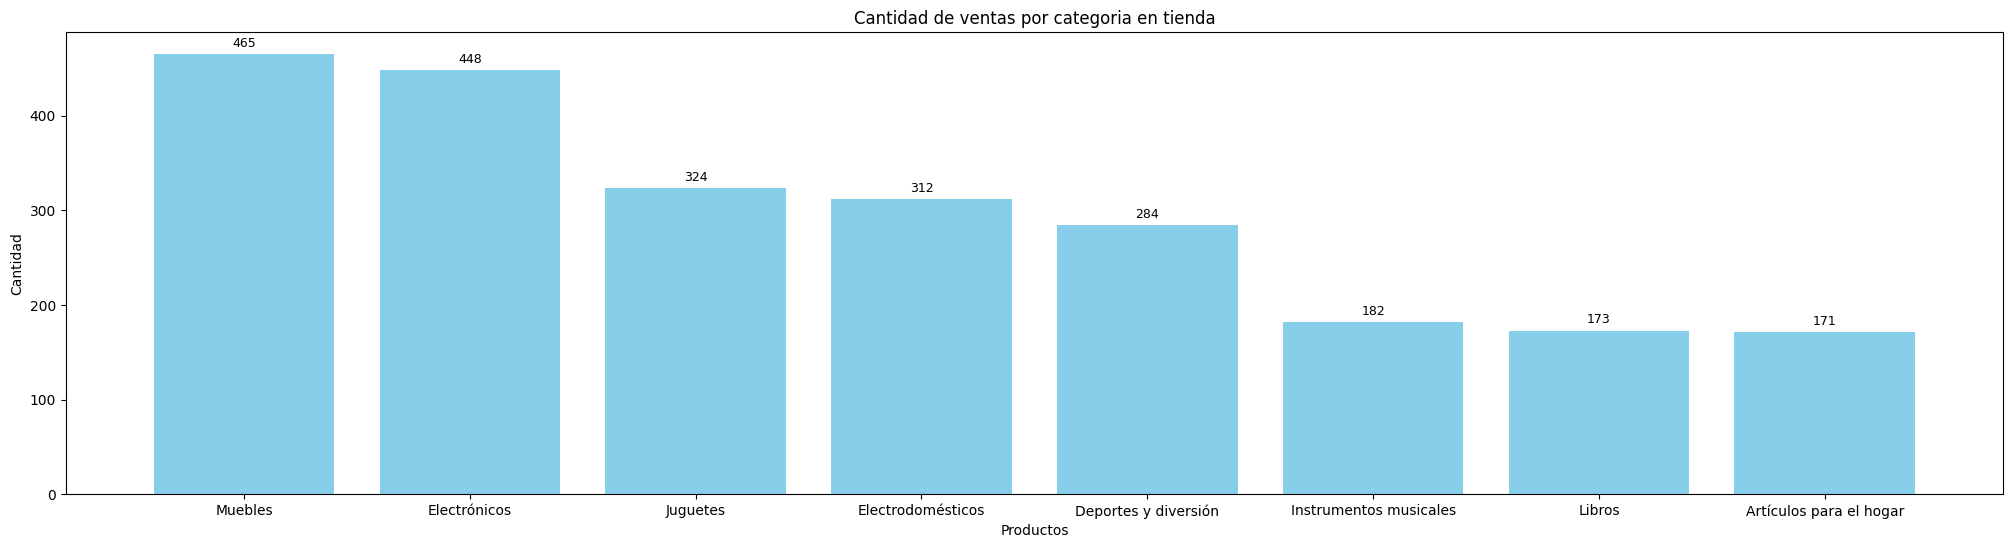

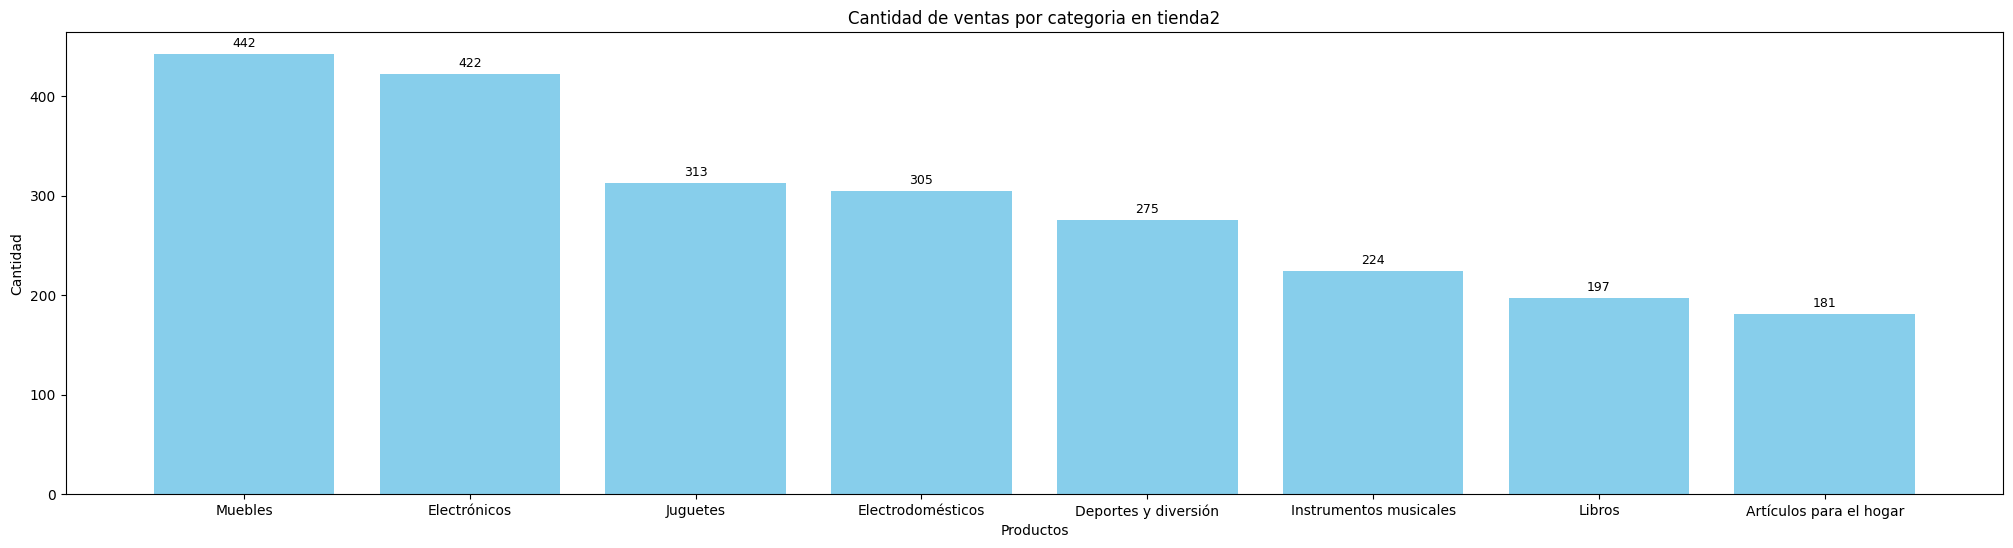

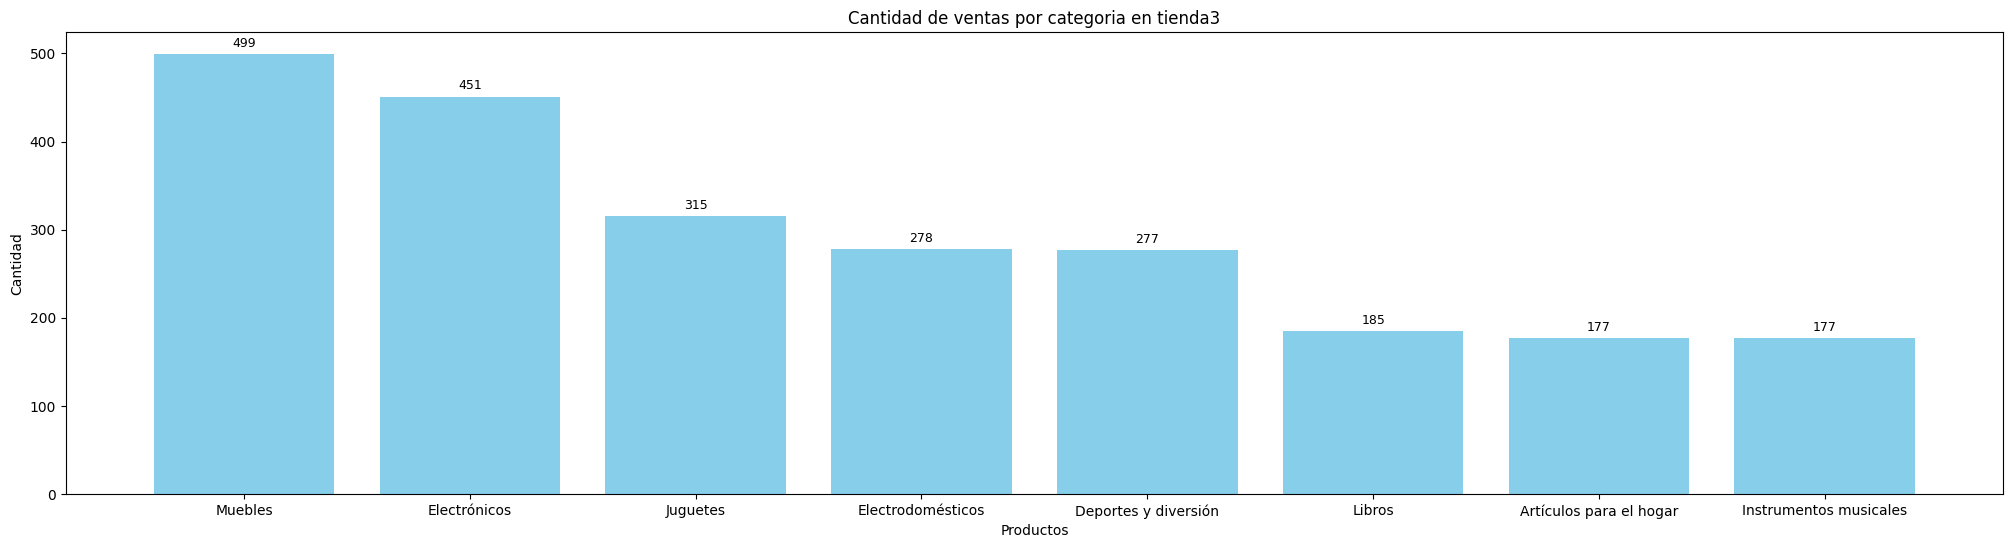

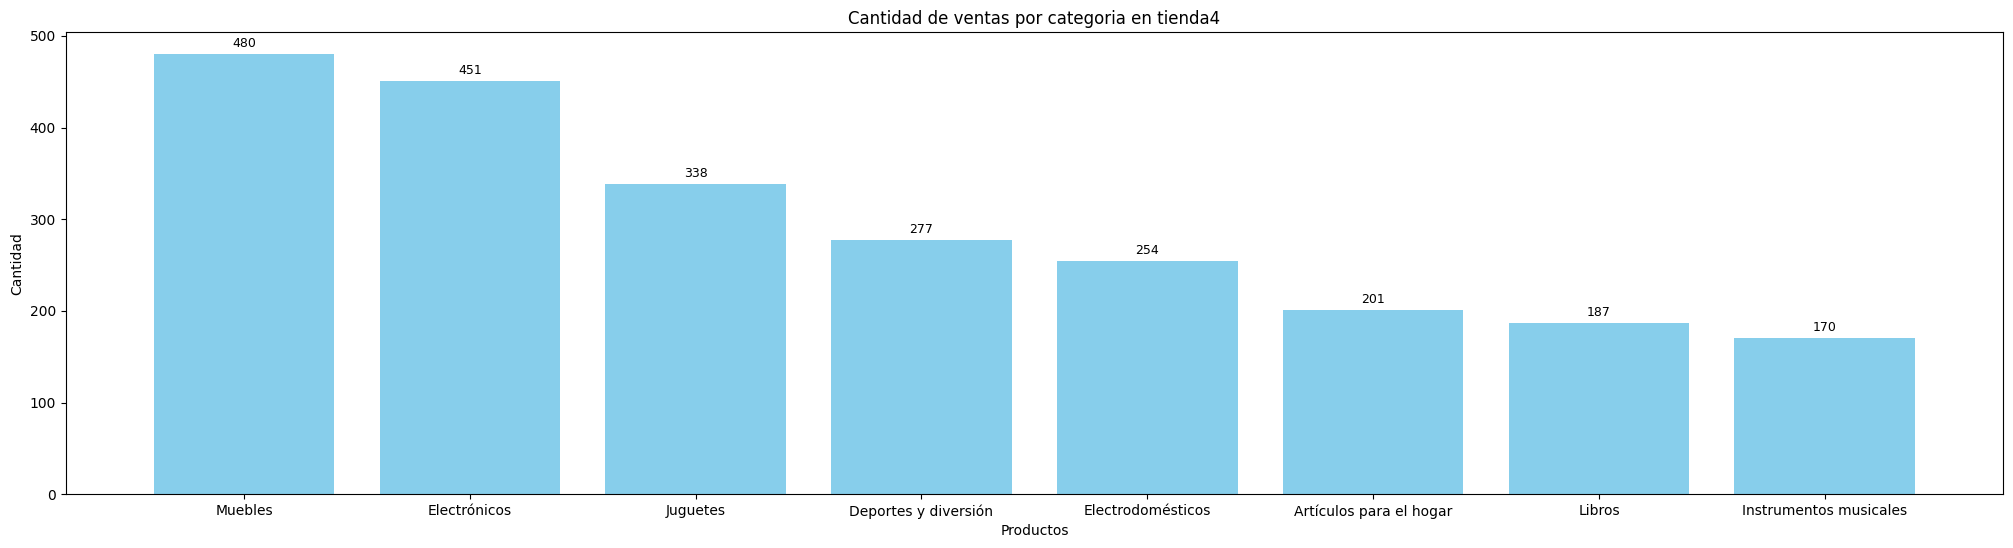

In [21]:
for data, tienda_1 in zip(datasets, tiendas_nombres):  
    resultado = data.groupby('Categoría del Producto')['Producto'].count().sort_values(ascending=False)
    
    fig, ax = plt.subplots(figsize=(25, 6))

    bars = ax.bar(resultado.index, resultado.values, color='skyblue')
    
   
    ax.set_title(f"Cantidad de ventas por categoria en {tienda_1}")
    ax.set_xlabel("Productos")
    ax.set_ylabel("Cantidad")
    
 
    ax.bar_label(bars, padding=3, fontsize=9)  

   
    plt.show()


# 3. Calificación promedio de la tienda


In [22]:
prom_calificacion=list((map(lambda ds: float(ds['Calificación'].mean()), datasets)))
agrupado_avg= list(zip(tiendas_nombres ,prom_calificacion))
for (tiendas, avg) in agrupado_avg:
    print(f"El promedio de calificacion de la {tiendas} es {avg}")

El promedio de calificacion de la tienda es 3.976685036032217
El promedio de calificacion de la tienda2 es 4.037303942348453
El promedio de calificacion de la tienda3 es 4.048325561678677
El promedio de calificacion de la tienda4 es 3.9957591178965224


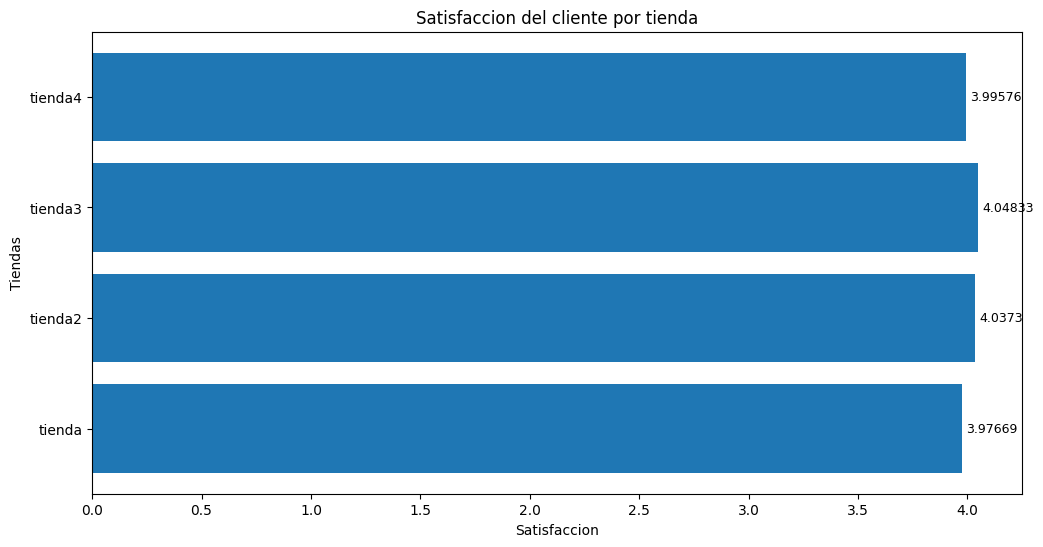

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))

bars_2=ax.barh(tiendas_nombres, prom_calificacion)


plt.title("Satisfaccion del cliente por tienda")
plt.xlabel("Satisfaccion")
plt.ylabel("Tiendas")
ax.bar_label(bars_2, padding=3, fontsize=9)  
plt.savefig("satisfaccionxtienda.png", bbox_inches='tight')


plt.show()

# 4. Productos más y menos vendidos

In [24]:
ventasxTienda={}
for i, data in enumerate(datasets):
    resultado_ventas = data.groupby('Producto')['Vendedor'].count().sort_values(ascending=False)
    ventasxTienda[tiendas_nombres[i]] = resultado_ventas

for tiendas, resultado_X in ventasxTienda.items():
    print(f"Resultados para {tiendas}:")
    print("Producto con MÁS ventas:")
    print(resultado_X.head(5))
    print("\nProducto con MENOS ventas:")
    print(resultado_X.tail(5))
    print("-" * 40)


Resultados para tienda:
Producto con MÁS ventas:
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56
Name: Vendedor, dtype: int64

Producto con MENOS ventas:
Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33
Name: Vendedor, dtype: int64
----------------------------------------
Resultados para tienda2:
Producto con MÁS ventas:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58
Name: Vendedor, dtype: int64

Producto con MENOS ventas:
Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32
Name: Vendedor, dtype: int64
----------------------------------------
Resultados para tienda3:
Producto con MÁS ventas:
Producto
Kit de 

# 5. Envío promedio por tienda

In [44]:
prom_envio=list((map(lambda ds: float(ds['Costo de envío'].mean()), datasets)))
envio_avg= list(zip(tiendas_nombres ,prom_envio))
for (tiendas, avg) in envio_avg:
    print(f"El costo de envio promedio de la {tiendas} es {avg}")

El costo de envio promedio de la tienda es 26018.60958033065
El costo de envio promedio de la tienda2 es 25216.235693090293
El costo de envio promedio de la tienda3 es 24805.680373039424
El costo de envio promedio de la tienda4 es 23459.457167090754


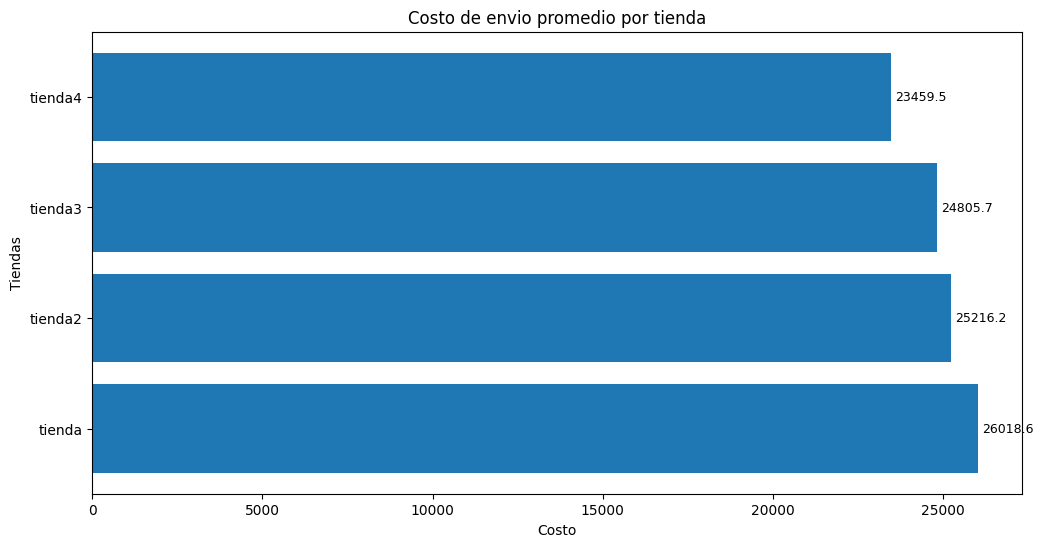

In [54]:
fig, ax = plt.subplots(figsize=(12, 6))

bars_3=ax.barh(tiendas_nombres, prom_envio)


plt.title("Costo de envio promedio por tienda")
plt.xlabel("Costo")
plt.ylabel("Tiendas")
ax.bar_label(bars_3, padding=3, fontsize=9)  
plt.savefig("costoenvioxtienda.png", bbox_inches='tight')


plt.show()

In [46]:
print(tienda['Costo de envío'].mean())
print(tienda2['Costo de envío'].mean())
print(tienda3['Costo de envío'].mean())
print(tienda4['Costo de envío'].mean())

26018.60958033065
25216.235693090293
24805.680373039424
23459.457167090754


Análisis de tienda a eliminar
El objetivo es identificar la tienda que debe vender el Sr. Juan, considerando las siguientes variables: 
- Los ingresos totales de las tiendas.
- Las categorías de productos más y menos vendidas.
- Las calificaciones promedio de los clientes por tienda.
- Los productos más y menos vendidos.
- El coste de envío promedio para cada tienda.

Análisis:
1) Ingresos totales de las tiendas

Los ingresos son liderados por la tienda 1 y 2 con  1150880400 y 1116343500 respectivamente. La tienda con menor venta es la tienda 4 con 1038375700.0

![Ventas por tienda](ventasxtienda.png)


2) Categorías de productos más y menos vendidas:

Todas las tiendas tienen como top 3 de categorías más vendidas a Muebles, Electrónicos y Juguetes, por otro lado, las categorías menos vendidas en las 4 tiendas son Libros, Instrumentos musicales y artículos para el hogar

3) Satisfacción del cliente

La satisfacción al cliente es liderada por la tienda 3 (4.04), seguida por la tienda 2 (4.03), la tienda 4 (3.99) y, finalmente, la tienda 1 (3.97).

![Satisfaccion por tienda](satisfaccionxtienda.png)


4) Productos más y menos vendidos

Adjunto el detalle del top 5 de productos más y menos vendidos por tienda:

Resultados para tienda:
Producto con MÁS ventas:
Producto
Armario             60
TV LED UHD 4K       60
Microondas          60
Secadora de ropa    58
Mesa de noche       56

Producto con MENOS ventas:
Producto
Mochila                      39
Pandereta                    36
Olla de presión              35
Celular ABXY                 33
Auriculares con micrófono    33

----------------------------------------
Resultados para tienda2:
Producto con MÁS ventas:
Producto
Iniciando en programación    65
Microondas                   62
Batería                      61
Pandereta                    58
Guitarra acústica            58

Producto con MENOS ventas:
Producto
Auriculares        37
Sillón             35
Impresora          34
Mesa de comedor    34
Juego de mesa      32

----------------------------------------
Resultados para tienda3:
Producto con MÁS ventas:
Producto
Kit de bancas      57
Mesa de comedor    56
Cama king          56
Set de ollas       55
Mesa de noche      55

Producto con MENOS ventas:
Producto
Guitarra eléctrica         38
Mochila                    36
Microondas                 36
Set de vasos               36
Bloques de construcción    35

----------------------------------------
Resultados para tienda4:
Producto con MÁS ventas:
Producto
Cama box                     62
Cubertería                   59
Cama king                    56
Dashboards con Power BI      56
Carrito de control remoto    55

Producto con MENOS ventas:
Producto
Ciencia de datos con Python    38
Refrigerador                   38
Guitarra acústica              37
Armario                        34
Guitarra eléctrica             33

----------------------------------------

5) Costo de envio promedio:

Se tienen los siguientes costos promedios de envio:
Tienda 1:26018.60958033065
Tienda 2:25216.235693090293
Tienda 3:24805.680373039424
Tienda 4:23459.457167090754

![Costo envio promedio por tienda](costoenvioxtienda.png)




Se observa que la tienda 1 y 2 son las que mayor costo de envio tienen, mientras que la Tienda 4 tiene el menor costo promedio de envío.


Conclusiones

La Tienda 4 debe venderse, pues es la que menos ventas tiene, ademas de ser la 3era con la peor satisfaccion del cliente. Yendo un poco mas a fondo, las ventas de la tienda 4 estan muy lejos de las demas. La satisfaccion no es la peor, pero debajo de la media. Lo positivo que tiene es el costo promedio de envio mas bajo, sin embargo esto refleja que quizas la ubicacion es mas estrategica, pero sigue sin vender lo suficiente, por lo que no se esta aprovechando como debería.